In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = f'/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/mussnichtinTiefenschichtbleiben/'
path_tides = f'/gxfs_work/geomar/smomw523/master-thesis/output_data/retention/tides'

In [3]:
import warnings
warnings.filterwarnings('ignore')

all_files = glob.glob(os.path.join(path, "2*.csv"))
dates = pd.date_range(start='2009-01-01', end='2009-12-31', freq = '5D')
df = pd.concat((pd.read_csv(f, index_col=0,skipfooter=1) for f in all_files), keys=dates)
df.index.names = ['start_date', 'obs']

all_files_tides = glob.glob(os.path.join(path_tides, "2*.csv"))
df_tides = pd.concat((pd.read_csv(f, index_col=0,skipfooter=1) for f in all_files_tides), keys=dates)
df_tides.index.names = ['start_date', 'obs']

In [4]:
dx = df.to_xarray()
dx_tides = df_tides.to_xarray()

In [5]:
dx_tides

<xarray.Dataset>
Dimensions:           (start_date: 73, obs: 44)
Coordinates:
  * start_date        (start_date) datetime64[ns] 2009-01-01 ... 2009-12-27
  * obs               (obs) int64 0 1 2 3 4 5 6 7 8 ... 36 37 38 39 40 41 42 43
Data variables:
    INALT-ML          (start_date, obs) float64 0.793 0.4355 0.1855 ... 0.0 nan
    INALT-rest        (start_date, obs) float64 0.8829 0.6721 ... 0.01821 nan
    INALT-bottom-100  (start_date, obs) float64 1.0 0.9011 0.8245 ... 0.1167 nan

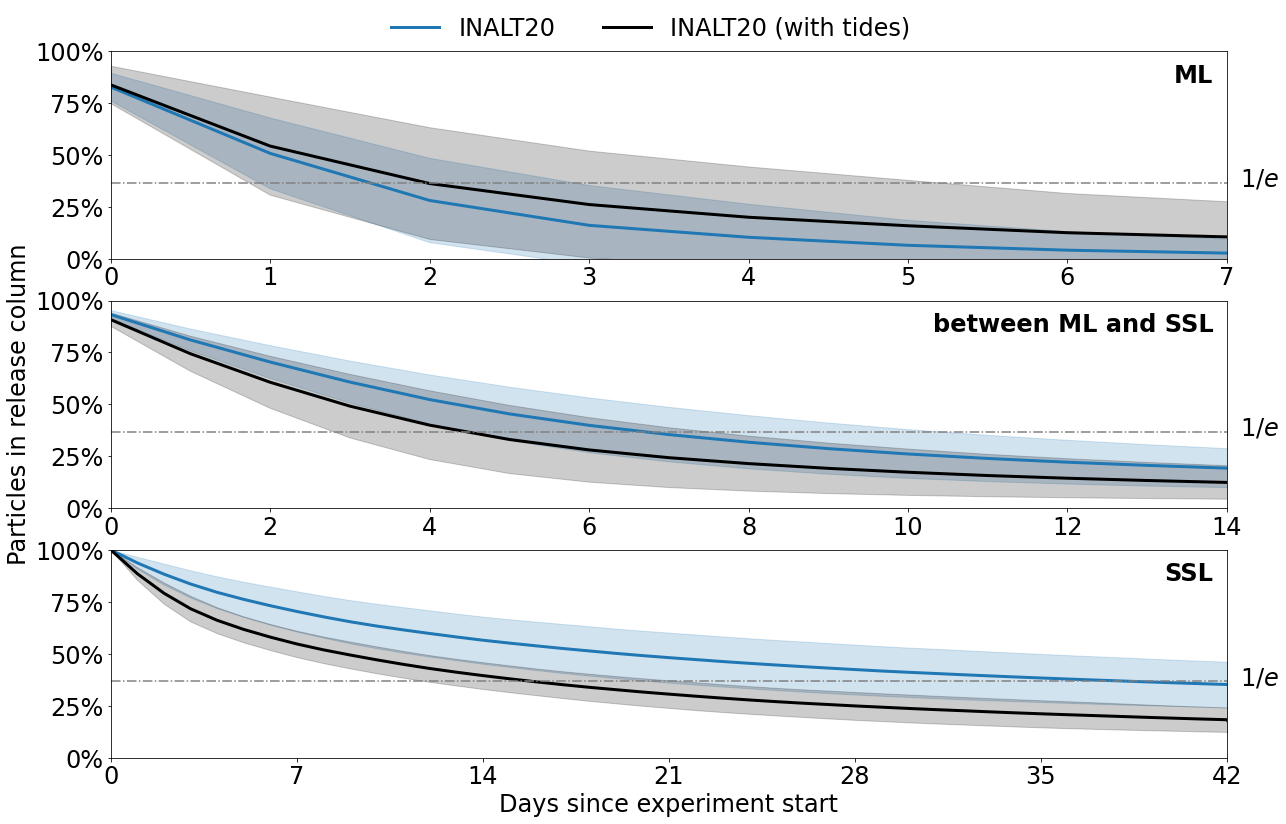

In [14]:
plt.rcParams.update({'font.size': 24,#'axes.labelsize': 22,
                    })

fig, axs = plt.subplots(3, 1, figsize=(20, 13))

lines = []
labels = []

xlabels = ['','','Days since experiment start']
ylabels = ['','Particles in release column','']
xticks = [[0, 1,2,3,4,5,6,7],[0, 2, 4, 6, 8, 10, 12, 14],[0, 7, 14, 21, 28, 35, 42]]

INALT = ['INALT-ML','INALT-rest','INALT-bottom-100']

for i, ax in enumerate(axs, start=1):
    mean_values = dx[INALT[i-1]].mean(dim='start_date')
    upper_envelope = mean_values + dx[INALT[i-1]].std(dim='start_date')
    lower_envelope = mean_values - dx[INALT[i-1]].std(dim='start_date')

    mean_values_tides = dx_tides[INALT[i-1]].mean(dim='start_date')
    upper_envelope_tides = mean_values_tides + dx_tides[INALT[i-1]].std(dim='start_date')
    lower_envelope_tides = mean_values_tides - dx_tides[INALT[i-1]].std(dim='start_date')

    line1, = ax.plot(np.arange(len(dx.obs)), mean_values, color='tab:blue', linewidth=3, label='INALT20')
    ax.fill_between(np.arange(len(dx.obs)), lower_envelope, upper_envelope, color='tab:blue', alpha=0.2)

    line2, = ax.plot(np.arange(len(dx_tides.obs)), mean_values_tides, color='black', linewidth=3, label='INALT20 (with tides)')
    ax.fill_between(np.arange(len(dx_tides.obs)), lower_envelope_tides, upper_envelope_tides, color='black', alpha=0.2)

    ax.text([7+.5/6,14+.5/3,42.5][i-1],0.35,'$1/e$')
    ax.text([7-.5/6,14-.5/3,41.5][i-1],0.85,['ML','between ML and SSL','SSL'][i-1],horizontalalignment='right', fontweight='bold')
    
    ax.axhline(y=1 / np.e, color='gray', linestyle='-.')
    ax.set_xticks(xticks[i-1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1], ['0%', '25%', '50%', '75%', '100%'])
    ax.set_xlim([0, 7 if i == 1 else 14 if i == 2 else 42])
    ax.set_ylim([0, 1])
    ax.set_xlabel(xlabels[i-1])
    ax.set_ylabel(ylabels[i-1])

    if 'INALT20' not in labels:
        lines.append(line1)
        labels.append('INALT20')
    if 'INALT20 (with tides)' not in labels:
        lines.append(line2)
        labels.append('INALT20 (with tides)')

fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.94), ncol=3, frameon=False)

plt.savefig('../../output_data/rp-mean-tides.pdf', bbox_inches='tight')
plt.show()


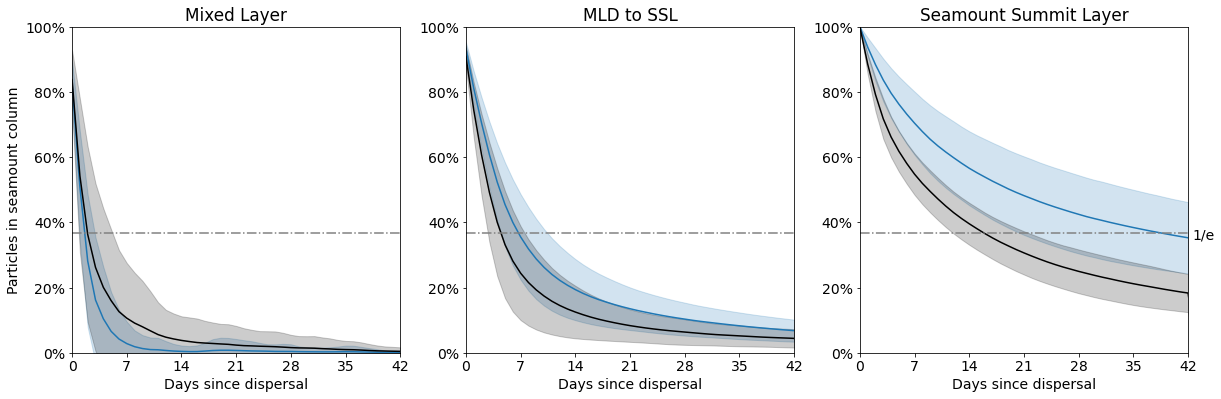

In [7]:
plt.rcParams['font.size'] = 14
#plt.rcParams['font.family'] = 'Arial'

mean_values = dx['INALT-ML'].mean(dim='start_date')
upper_envelope = mean_values+dx['INALT-ML'].std(dim='start_date')
lower_envelope = mean_values-dx['INALT-ML'].std(dim='start_date')

mean_values_tides = dx_tides['INALT-ML'].mean(dim='start_date')
upper_envelope_tides = mean_values_tides+dx_tides['INALT-ML'].std(dim='start_date')
lower_envelope_tides = mean_values_tides-dx_tides['INALT-ML'].std(dim='start_date')

# Plot
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.plot(np.arange(len(dx.obs)), mean_values, color='tab:blue',label='KFS119')
plt.fill_between(np.arange(len(dx.obs)), lower_envelope,
                 upper_envelope, color='tab:blue', alpha=0.2)

plt.plot(np.arange(len(dx_tides.obs)), mean_values_tides, color='black',label='KFS104 (with tides)')
plt.fill_between(np.arange(len(dx_tides.obs)), lower_envelope_tides,
                 upper_envelope_tides, color='black', alpha=0.2)

plt.axhline(y=1/np.e, color='gray', linestyle='-.')
#plt.text(42.5,0.35,'1/e')
plt.xticks([0,7,14,21,28,35,42])
plt.yticks([0,0.2,.4,.6,.8,1],['0%','20%','40%','60%','80%','100%'])
plt.xlim([0,42])
plt.ylim([0,1])
plt.ylabel('Particles in seamount column')
plt.xlabel('Days since dispersal')
plt.title('Mixed Layer')
#plt.legend()

############################################################
mean_values = dx['INALT-rest'].mean(dim='start_date') #INALT-ML-to-tip
upper_envelope = mean_values+dx['INALT-rest'].std(dim='start_date')
lower_envelope = mean_values-dx['INALT-rest'].std(dim='start_date')

mean_values_tides = dx_tides['INALT-rest'].mean(dim='start_date')
upper_envelope_tides = mean_values_tides+dx_tides['INALT-rest'].std(dim='start_date')
lower_envelope_tides = mean_values_tides-dx_tides['INALT-rest'].std(dim='start_date')

plt.subplot(1,3,2)
plt.plot(np.arange(len(dx.obs)), mean_values, color='tab:blue',label='KFS119')
plt.fill_between(np.arange(len(dx.obs)), lower_envelope,
                 upper_envelope, color='tab:blue', alpha=0.2)

plt.plot(np.arange(len(dx_tides.obs)), mean_values_tides, color='black',label='KFS104 (with tides)')
plt.fill_between(np.arange(len(dx_tides.obs)), lower_envelope_tides,
                 upper_envelope_tides, color='black', alpha=0.2)

plt.axhline(y=1/np.e, color='gray', linestyle='-.')
#plt.text(42.5,0.35,'1/e')
plt.xticks([0,7,14,21,28,35,42])
plt.yticks([0,0.2,.4,.6,.8,1],['0%','20%','40%','60%','80%','100%'])
plt.xlim([0,42])
plt.ylim([0,1])
plt.xlabel('Days since dispersal')
plt.title('MLD to SSL')
#plt.legend()

##################################################################
mean_values = dx['INALT-bottom-100'].mean(dim='start_date') #INALT-tip-to-1500
upper_envelope = mean_values+dx['INALT-bottom-100'].std(dim='start_date')
lower_envelope = mean_values-dx['INALT-bottom-100'].std(dim='start_date')

mean_values_tides = dx_tides['INALT-bottom-100'].mean(dim='start_date')
upper_envelope_tides = mean_values_tides+dx_tides['INALT-bottom-100'].std(dim='start_date')
lower_envelope_tides = mean_values_tides-dx_tides['INALT-bottom-100'].std(dim='start_date')

plt.subplot(1,3,3)
plt.plot(np.arange(len(dx.obs)), mean_values, color='tab:blue',label='KFS119')
plt.fill_between(np.arange(len(dx.obs)), lower_envelope,
                 upper_envelope, color='tab:blue', alpha=0.2)

plt.plot(np.arange(len(dx_tides.obs)), mean_values_tides, color='black',label='KFS104 (with tides)')
plt.fill_between(np.arange(len(dx_tides.obs)), lower_envelope_tides,
                 upper_envelope_tides, color='black', alpha=0.2)

plt.axhline(y=1/np.e, color='gray', linestyle='-.')
plt.text(42.5,0.35,'1/e')
plt.xticks([0,7,14,21,28,35,42])
plt.yticks([0,0.2,.4,.6,.8,1],['0%','20%','40%','60%','80%','100%'])
plt.xlim([0,42])
plt.ylim([0,1])
plt.xlabel('Days since dispersal')
plt.title('Seamount Summit Layer');
#plt.legend()

In [8]:
# First time passing threshold
ML_INALT, ML_INALT_tides, ML_ROMS, ML_ROMSchild = [], [], [], []
MLtip_INALT, MLtip_INALT_tides, MLtip_ROMS, MLtip_ROMSchild = [], [], [], []
tip1500_INALT, tip1500_INALT_tides, tip1500_ROMS, tip1500_ROMSchild = [], [], [], []

threshold = 1/np.e

for j in np.arange(len(dx.start_date)):
    dx.isel(start_date=j)['INALT-ML'].plot()
    dx.isel(start_date=j)['ROMS-ML'].plot()
    dx.isel(start_date=j)['ROMSchild-ML'].plot()
    dx.isel(start_date=j)['INALT-rest'].plot()
    dx.isel(start_date=j)['ROMS-rest'].plot()
    dx.isel(start_date=j)['ROMSchild-rest'].plot()
    dx.isel(start_date=j)['INALT-bottom-100'].plot()
    dx.isel(start_date=j)['ROMS-bottom-100'].plot()
    dx.isel(start_date=j)['ROMSchild-bottom-100'].plot()
    
    dx_tides.isel(start_date=j)['INALT-ML'].plot()
    dx_tides.isel(start_date=j)['INALT-rest'].plot()
    dx_tides.isel(start_date=j)['INALT-bottom-100'].plot()

    lines = plt.gca().get_lines()
    x_data = lines[0].get_xdata()
    y_data1 = lines[0].get_ydata()
    y_data2 = lines[1].get_ydata()
    y_data3 = lines[2].get_ydata()
    y_data4 = lines[3].get_ydata()
    y_data5 = lines[4].get_ydata()
    y_data6 = lines[5].get_ydata()
    y_data7 = lines[6].get_ydata()
    y_data8 = lines[7].get_ydata()
    y_data9 = lines[8].get_ydata()
    y_data10 = lines[9].get_ydata()
    y_data11 = lines[10].get_ydata()
    y_data12 = lines[11].get_ydata()

    intersec_INALT, intersec_INALT2, intersec_INALT3 = None, None, None
    intersec_INALT_tides, intersec_INALT2_tides, intersec_INALT3_tides = None, None, None
    intersec_ROMS, intersec_ROMS2, intersec_ROMS3 = None, None, None
    intersec_ROMSchild, intersec_ROMSchild2, intersec_ROMSchild3 = None, None, None

    for i in range(len(x_data)):
        if y_data1[i] < threshold and intersec_INALT is None:
            intersec_INALT = x_data[i]
        if y_data2[i] < threshold and intersec_ROMS is None:
            intersec_ROMS = x_data[i]
        if y_data3[i] < threshold and intersec_ROMSchild is None:
            intersec_ROMSchild = x_data[i]
        if y_data4[i] < threshold and intersec_INALT2 is None:
            intersec_INALT2 = x_data[i]
        if y_data5[i] < threshold and intersec_ROMS2 is None:
            intersec_ROMS2 = x_data[i]
        if y_data6[i] < threshold and intersec_ROMSchild2 is None:
            intersec_ROMSchild2 = x_data[i]
        if y_data7[i] < threshold and intersec_INALT3 is None:
            intersec_INALT3 = x_data[i]
        if y_data8[i] < threshold and intersec_ROMS3 is None:
            intersec_ROMS3 = x_data[i]
        if y_data9[i] < threshold and intersec_ROMSchild3 is None:
            intersec_ROMSchild3 = x_data[i]
            
        if y_data10[i] < threshold and intersec_INALT_tides is None:
            intersec_INALT_tides = x_data[i]
        if y_data11[i] < threshold and intersec_INALT2_tides is None:
            intersec_INALT2_tides = x_data[i]
        if y_data12[i] < threshold and intersec_INALT3_tides is None:
            intersec_INALT3_tides = x_data[i]
    
    ML_INALT.append(intersec_INALT)
    ML_ROMS.append(intersec_ROMS)
    ML_ROMSchild.append(intersec_ROMSchild)
    MLtip_INALT.append(intersec_INALT2)
    MLtip_ROMS.append(intersec_ROMS2)
    MLtip_ROMSchild.append(intersec_ROMSchild2)
    tip1500_INALT.append(intersec_INALT3)
    tip1500_ROMS.append(intersec_ROMS3)
    tip1500_ROMSchild.append(intersec_ROMSchild3)
    
    ML_INALT_tides.append(intersec_INALT_tides)
    MLtip_INALT_tides.append(intersec_INALT2_tides)
    tip1500_INALT_tides.append(intersec_INALT3_tides)
    plt.close()

In [9]:
dict = {'INALT-ML': ML_INALT,'INALT-ML-to-tip': MLtip_INALT,'INALT-tip-to-1500': tip1500_INALT,
        'ROMS-ML': ML_ROMS,'ROMS-ML-to-tip': MLtip_ROMS,'ROMS-tip-to-1500': tip1500_ROMS,
        'ROMSchild-ML': ML_ROMSchild,'ROMSchild-ML-to-tip': MLtip_ROMSchild,'ROMSchild-tip-to-1500': tip1500_ROMSchild,
        'INALT_tides-ML': ML_INALT_tides,'INALT_tides-ML-to-tip': MLtip_INALT_tides,'INALT_tides-tip-to-1500': tip1500_INALT_tides}

In [10]:
retentions = pd.DataFrame(dict,index=dates).fillna(43.5)

In [11]:
retentions

,INALT-ML,INALT-ML-to-tip,INALT-tip-to-1500,ROMS-ML,ROMS-ML-to-tip,ROMS-tip-to-1500,ROMSchild-ML,ROMSchild-ML-to-tip,ROMSchild-tip-to-1500,INALT_tides-ML,INALT_tides-ML-to-tip,INALT_tides-tip-to-1500
2009-01-01,4,5,26.0,2,2,3,2,2,2,2,4,25
2009-01-06,2,12,43.5,1,3,4,2,3,2,1,3,14
2009-01-11,3,13,37.0,2,3,4,2,3,2,1,3,14
2009-01-16,4,12,41.0,2,4,5,2,3,3,1,3,14
2009-01-21,2,7,43.5,2,4,3,1,3,3,5,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-07,2,4,34.0,1,2,3,1,3,3,4,4,22
2009-12-12,3,4,36.0,1,2,3,2,3,2,2,3,22
2009-12-17,2,7,43.5,1,2,3,1,3,2,7,6,11
2009-12-22,1,7,43.5,2,2,2,2,2,2,1,4,17


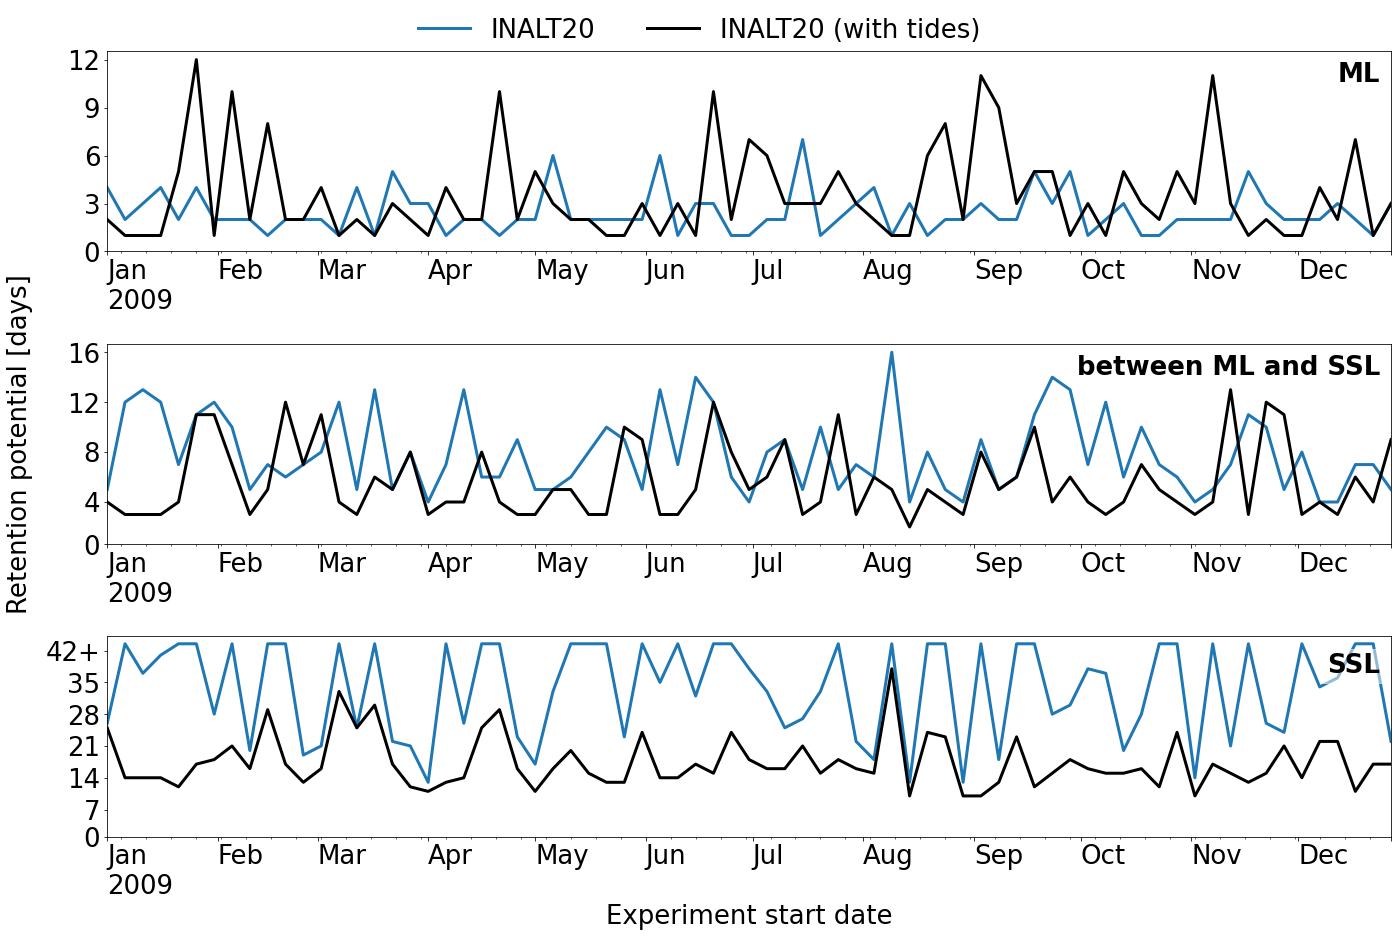

In [15]:
plt.rcParams.update({'font.size': 26})

fig, axs = plt.subplots(3, 1, figsize=(20, 13))

dates = pd.date_range('2009-01-01', periods=12, freq='M')

ylabels = ['','Retention potential [days]\n ','']

INALT = ['INALT-ML', 'INALT-ML-to-tip', 'INALT-tip-to-1500']
INALT_tides = ['INALT_tides-ML', 'INALT_tides-ML-to-tip', 'INALT_tides-tip-to-1500']

for i, ax in enumerate(axs, start=1):
    line1=retentions[INALT[i - 1]].plot(color='tab:blue', label='INALT20', linewidth=3, ax=ax)
    line2=retentions[INALT_tides[i - 1]].plot(color='black', label='INALT20 (with tides)', linewidth=3, ax=ax)
    
    ax.text('2009-12-24',[12-.5/42*12,16-.5/42*16,41.5][i-1],['ML','between ML and SSL','SSL'][i-1],
            horizontalalignment='right',verticalalignment='top', fontweight='bold',
            backgroundcolor=(1, 1, 1, 0.5))
    
    formatted_dates = [date.strftime('%b\n%Y' if i == 0 else '%b') for i, date in enumerate(dates)]
    ax.set_xticklabels(formatted_dates, ha='left')
    ax.set_xlabel(['','','Experiment start date'][i-1])
    ax.set_ylabel(ylabels[i-1])
    
    ax.set_yticks([[0,3,6,9,12],[5/8,4, 8, 12, 16],[1, 7, 14, 21, 28, 35, 42]][i-1])
    if i == 2:
        ax.set_yticklabels([0,4, 8, 12, 16])
    if i == 3:
        ax.set_yticklabels(['0', '7', '14', '21', '28', '35', '42+'])
        
    if 'INALT20' not in labels:
        lines.append(line1)
        labels.append('INALT20')
    if 'INALT20 (with tides)' not in labels:
        lines.append(line2)
        labels.append('INALT20 (with tides)')

fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3, frameon=False)

plt.tight_layout()
plt.savefig('../../output_data/rp-year-tides.pdf', bbox_inches='tight')
plt.show()


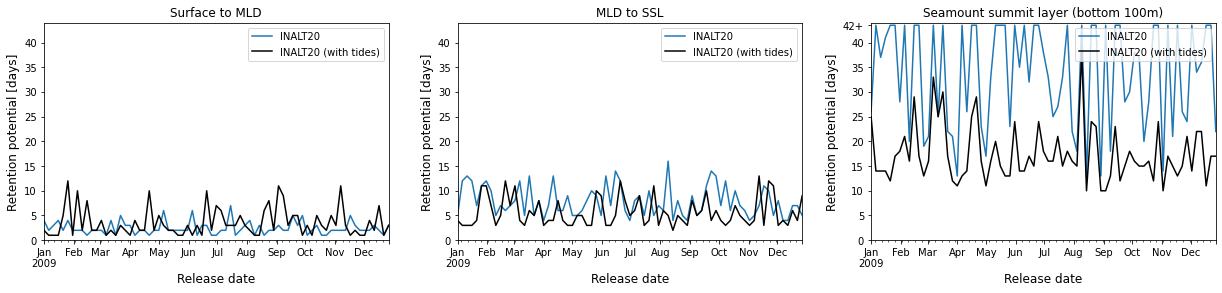

In [12]:
plt.figure(figsize=(21,4))
plt.subplot(1, 3,1)
retentions['INALT-ML'].plot(color='tab:blue',label='INALT20')
retentions['INALT_tides-ML'].plot(color='black',label='INALT20 (with tides)')
plt.title('Surface to MLD', fontsize=12)
plt.xlabel('Release date', fontsize =12)
plt.ylabel('Retention potential [days]', fontsize =12)
plt.ylim([0,44])
#plt.gca().invert_xaxis()
plt.legend()

plt.subplot(1, 3,2)
retentions['INALT-ML-to-tip'].plot(color='tab:blue',label='INALT20')
retentions['INALT_tides-ML-to-tip'].plot(color='black',label='INALT20 (with tides)')
plt.title('MLD to SSL', fontsize=12)
plt.xlabel('Release date', fontsize =12)
plt.ylabel('Retention potential [days]', fontsize =12)
plt.ylim([0,44])
#plt.gca().invert_xaxis()
plt.legend()

plt.subplot(1, 3,3)
retentions['INALT-tip-to-1500'].plot(color='tab:blue',label='INALT20')
retentions['INALT_tides-tip-to-1500'].plot(color='black',label='INALT20 (with tides)')
plt.title('Seamount summit layer (bottom 100m)', fontsize=12)
plt.xlabel('Release date', fontsize =12)
plt.ylabel('Retention potential [days]', fontsize =12)
plt.ylim([0,44])
plt.yticks([0,5,10,15,20,25,30,35,40,43.5],[0,5,10,15,20,25,30,35,40,'42+'])
#plt.gca().invert_xaxis()
plt.legend(loc=1);